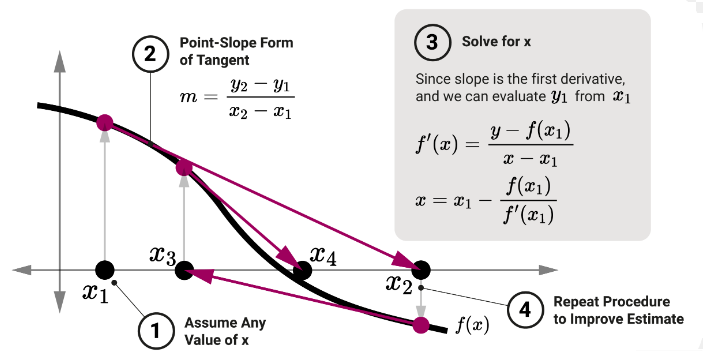

<div style="text-align: center;">

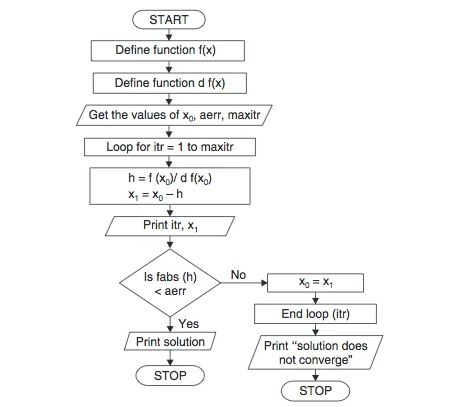
</div>


**Newton Raphson Method Algorithm:**


1. Start

2. Read x, e, n, d

    *x is the initial guess

    e is the absolute error i.e the desired degree of accuracy

    n is for operating loop

    d is for checking slope*

3. Do for i =1 to n in step of 2
4. f = f(x)
5. f1 = f'(x)
6. If ( [f1] < d), then display too small slope and goto 11.

    *[ ] is used as modulus sign*
7. x1 = x – f/f1
8. If ( [(x1 – x)/x1] < e ), the display the root as x1 and goto 11.

    *[ ] is used as modulus sign*
9. x = x1 and end loop
10. Display method does not converge due to oscillation.
11. Stop

<div dir="rtl" style="text-align: right;">

 **یک مثال ساده برای درک بهتر این الگوریتم**


معادله تابع جذر که در کد استفاده شده است، به صورت زیر است:

$$
f(x) = x^2 - R
$$

در اینجا، ( R ) عددی است که میخواهیم جذر آن را پیدا کنیم. برای استفاده از روش نیوتن-رافسون، از فرمول بازگشتی زیر استفاده میکنیم:

$$
x_{i+1} = \frac{x_i + \frac{R}{x_i}}{2}
$$

این فرمول به ما کمک میکند تا با استفاده از حدس اولیه ( x_0 )، مقدار جدید ( x ) را محاسبه کنیم و این فرآیند را تکرار کنیم تا به مقدار دقیق جذر برسیم.

در کد پایتون شما، این فرمول به صورت زیر پیادهسازی شده است:

next_x = 0.5 * (x + number / x)

این خط کد مقدار جدید ( x ) را با استفاده از مقدار فعلی ( x ) و عدد ( number ) (که همان ( R ) است) محاسبه میکند. این فرآیند تا زمانی که تفاوت بین مقدار جدید و مقدار قبلی کمتر از مقدار خطای مجاز (tolerance) شود، تکرار میشود.

</div>


In [ ]:
import math

def newton_raphson_sqrt(number, initial_guess=1.0, tolerance=1e-10, max_iterations=1000):
    """
    محاسبه ریشه دوم یک عدد با استفاده از روش نیوتن-رافسون

    آرگومان‌ها:
        number: عددی که می‌خواهیم ریشه دوم آن را محاسبه کنیم.
        initial_guess: حدس اولیه برای ریشه دوم.
        tolerance: مقدار خطای مجاز.
        max_iterations: حداکثر تعداد تکرارها.

    بازگشت:
        تقریب ریشه دوم عدد.
    """

    x = initial_guess
    for _ in range(max_iterations):
        next_x = 0.5 * (x + number / x)
        print(next_x)
        if abs(next_x - x) < tolerance:
            return next_x
        x = next_x

# مثال:
result = newton_raphson_sqrt(62.41)
print(f"جذر 62.41 برابر است با: {result}")

31.705
16.836729616779685
10.27175324606486
8.17381953817739
7.904586420041296
7.900001330572383
7.900000000000112
7.9
جذر 62.41 برابر است با: 7.9


<div dir="rtl" style="text-align: right;">


بعد از درک کامل الگوریتم این الگوریتم را برای دستگاه معادلات جبر خطی پیاده سازی میکنیم

<div dir="rtl" style="text-align: right;">


سوالی که خود استاد در کلاس حل کردند و تبدیل آن به پایتون

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, shapiro

In [ ]:
def doze():
  # تعریف بردار x0 با مقدار 1 برای هر عنصر
  x0 = np.ones(7)
  # تعریف بردار x1 با مقادیر مشخص
  x1 = np.array([2, 4, 6, 8, 10, 12, 14])
  # تعریف بردار x2 با مقادیر مشخص
  x2 = np.array([15, 16, 11, 10, 7, 6, 5])
  # ترکیب بردارهای x0، x1 و x2 به صورت ماتریس
  x = np.column_stack((x0, x1, x2))
  # تعریف بردار y با مقادیر مشخص
  y = np.array([0, 0, 1, 2, 3, 4, 6])
  # تعریف بردار n با مقادیر مشخص
  n = np.array([5, 4, 6, 6, 7, 5, 7])
  # تعریف ماتریس b با ابعاد 3x50 و مقدار اولیه صفر
  b = np.zeros((3, 50))
  # تعریف ماتریس z با ابعاد 7x50 و مقدار اولیه صفر
  z = np.zeros((7, 50))
  # تعریف ماتریس yhat با ابعاد 7x50 و مقدار اولیه صفر
  yhat = np.zeros((7, 50))
  # تعریف ماتریس syhat با ابعاد 3x50 و مقدار اولیه صفر
  syhat = np.zeros((3, 50))
  # تعریف بردار kai2 با مقدار اولیه صفر
  kai2 = np.zeros(50)
  # تعریف ماتریس e با ابعاد 3x50 و مقدار اولیه صفر
  e = np.zeros((3, 50))
  # مقداردهی اولیه به ستون اول ماتریس e
  e[:, 0] = np.array([0, 0, 0])
  # تعریف بردار sy با مقدار اولیه صفر
  sy = np.array([0, 0, 0])
  # مقداردهی اولیه به ستون اول ماتریس yhat
  yhat[:, 0] = y
  # تعریف ماتریس p با ابعاد 7x50 و مقدار اولیه صفر
  p = np.zeros((7, 50))
  # مقداردهی اولیه به ستون اول ماتریس p
  p[:, 0] = (y + 0.5) / (n + 0.5)

  # حلقه برای 49 تکرار
  for i in range(49):
    # محاسبه z برای هر تکرار
    z[:, i] = np.log(p[:, i] / (1 - p[:, i])) + (y - n * p[:, i]) / (n * p[:, i] * (1 - p[:, i]))
    print(z[:, i])

    # تعریف ماتریس W به عنوان ماتریس قطری
    W = np.diag(n * p[:, i] * (1 - p[:, i]))
    print(W)

    # محاسبه b برای هر تکرار
    b[:, i + 1] = np.linalg.solve(x.T @ W @ x, x.T @ W @ z[:, i])
    print(b[:, i + 1])

    # محاسبه p برای هر تکرار
    p[:, i + 1] = np.exp(x @ b[:, i + 1]) / (1 + np.exp(x @ b[:, i + 1]))
    print(p[:, i + 1])

    # محاسبه yhat برای هر تکرار
    yhat[:, i + 1] = n * p[:, i + 1]
    print(yhat[:, i + 1])

    # محاسبه syhat برای هر تکرار
    syhat[:, i + 1] = yhat[:, i + 1] @ x
    print(syhat[:, i + 1])

    # محاسبه sy برای هر تکرار
    sy = y @ x
    print(sy)

    # محاسبه e برای هر تکرار
    e[:, i + 1] = syhat[:, i + 1] - sy
    print(e[:, i + 1])

    # محاسبه kai2 برای هر تکرار
    kai2[i + 1] = np.sum(((y - yhat[:, i + 1]) ** 2) / yhat[:, i + 1])
    print(kai2[i + 1])

    print({i},"******************")

    # رسم نمودار p برای هر تکرار
    # plt.plot(x1, p[:, i + 1])

    # # نمایش نمودار
    # plt.show()
  return b

# اجرای تابع doze و چاپ نتیجه
b = doze()
b

<div dir="rtl" style="text-align: right;">
چاپ ضرایب نهایی

In [ ]:
b[:,-1]

array([-3.81523993,  0.43678068, -0.06943062])

<div dir="rtl" style="text-align: right;">


اجرای کد بالا از طریق کتابخانه پایتون

In [ ]:
import numpy as np
import statsmodels.api as sm

# تعریف دادهها
x1 = np.array([2, 4, 6, 8, 10, 12, 14])
x2 = np.array([15, 16, 11, 10, 7, 6, 5])
y = np.array([0, 0, 1, 2, 3, 4, 6])
n = np.array([5, 4, 6, 6, 7, 5, 7])

# ساخت ماتریس طراحی
X = np.column_stack((np.ones(len(x1)), x1, x2))

# محاسبه نسبت موفقیتها
y_ratio = y / n

# مدل رگرسیون لجستیک
model = sm.GLM(y_ratio, X, family=sm.families.Binomial(), var_weights=n)
result = model.fit()

# چاپ ضرایب
result.params

array([-3.81523993,  0.43678068, -0.06943062])


**مقایسه روش های**


Method 1 (Pseudo-inverse)

Method 2 (Matrix Multiplication)

Method 3 (SVD)

Method 4 (SVD+reg)

Method 5 (newton)



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# دادهها
x = np.array([
[1, 1, 0, 0, 0, 0],
[1, 1, 0, 0, 0, 0],
[1, 1, 0, 0, 0, 0],
[1, 1, 0, 0, 0, 0],
[1, 1, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 0],
[1, 0, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 0],
[1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 1]
])
y = np.array([7, 12, 14, 19, 7, 7, 17, 18, 25, 10, 15, 12, 18, 22, 11, 11, 18, 19, 19, 15, 9, 18, 19, 23, 11])

# محاسبه شبه معکوس ماتریس
x_pseudo_inv = np.linalg.pinv(x)
b0 = np.dot(x_pseudo_inv, y)
yhat0 = np.dot(x, b0)

# محاسبه ضرایب با استفاده از ضرب ماتریسها
b1 = np.dot(np.linalg.pinv(np.dot(x.T, x)), np.dot(x.T, y))
yhat1 = np.dot(x, b1)

# تجزیه مقدار منفرد (SVD)
U, S, Vt = np.linalg.svd(x, full_matrices=False)
b2 = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y
yhat2 = x @ b2

# تجزیه مقدار منفرد (SVD) با منظمسازی
lambda_ = 1e-5  # مقدار منظمسازی
S_inv = np.diag(S / (S**2 + lambda_))
b3 = Vt.T @ S_inv @ U.T @ y
yhat3 = x @ b3

# تابع doze
def doze():
  n = np.ones(len(y))  # فرض میکنیم تعداد مشاهدات برای هر نقطه داده برابر با 1 است
  b = np.zeros((x.shape[1], 50))
  z = np.zeros((len(y), 50))
  yhat = np.zeros((len(y), 50))
  syhat = np.zeros((x.shape[1], 50))
  kai2 = np.zeros(50)
  e = np.zeros((x.shape[1], 50))
  e[:, 0] = np.zeros(x.shape[1])
  sy = np.zeros(x.shape[1])
  yhat[:, 0] = y
  p = np.zeros((len(y), 50))
  p[:, 0] = (y + 0.5) / (n + 0.5)

  for i in range(49):
    p[:, i] = np.clip(p[:, i], 1e-10, 1 - 1e-10)
    z[:, i] = np.log(p[:, i] / (1 - p[:, i])) + (y - n * p[:, i]) / (n * p[:, i] * (1 - p[:, i]))
    W = np.diag(n * p[:, i] * (1 - p[:, i]))
    b[:, i + 1] = np.linalg.solve(x.T @ W @ x, x.T @ W @ z[:, i])
    xb = np.clip(x @ b[:, i + 1], -500, 500)
    p[:, i + 1] = np.exp(xb) / (1 + np.exp(xb))
    yhat[:, i + 1] = n * p[:, i + 1]
    syhat[:, i + 1] = yhat[:, i + 1] @ x
    sy = y @ x
    e[:, i + 1] = syhat[:, i + 1] - sy
    kai2[i + 1] = np.sum(((y - yhat[:, i + 1]) ** 2) / yhat[:, i + 1])
  return b[:, -1]

# اجرای تابع doze
b_newton = doze()

# ایجاد DataFrame برای نمایش ضرایب
coefficients_df = pd.DataFrame({
'Method 1 (Pseudo-inverse)': b0,
'Method 2 (Matrix Multiplication)': b1,
'Method 4 (SVD+reg)': b3,
'Method 5 (newton)': b_newton,
'Method 3 (SVD)': b2,

})

coefficients_df


,Method 1 (Pseudo-inverse),Method 2 (Matrix Multiplication),Method 4 (SVD+reg),Method 5 (newton),Method 3 (SVD)
0,12.533333,12.533333,12.533329,-5.776906e+10,1.030921e+16
1,-0.733333,-0.733333,-0.733328,1.657690e+11,-1.030921e+16
2,2.866667,2.866667,2.866665,2.017690e+11,-1.030921e+16
3,3.066667,3.066667,3.066665,2.037690e+11,-1.030921e+16
4,3.866667,3.866667,3.866663,2.117690e+11,-1.030921e+16
5,3.466667,3.466667,3.466664,2.077690e+11,-1.030921e+16


In [7]:
pip install ucimlrepo

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features # متغیرهای مستقل
y = breast_cancer_wisconsin_diagnostic.data.targets # متغیر وابسته

# تبدیل y به آرایه numpy و تبدیل مقادیر متنی به عددی
y = y.replace({'M': 1, 'B': 0}).values.ravel()

<ipython-input-24-90113aa22f34>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'M': 1, 'B': 0}).values.ravel()


In [29]:
# ترکیب X و y در یک DataFrame
data = pd.concat([X, pd.Series(y, name='target')], axis=1)
data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


<div dir="rtl" style="text-align: right;">

حالا همین روش رو بر روی داده های دیتا ست دیابت پیاده سازی میکنیم

<div dir="rtl" style="text-align: right;">


درک کلی از تابع Doze:
 تابع Doze  یک مدل رگرسیون لجستیک با برخی ویژگیهای اضافی مانند وزن دهی است. این مدل برای پیشبینی احتمال وقوع یک رویداد دودویی (۰ یا ۱) بر اساس متغیرهای مستقل استفاده میشود.
مراحل بررسی داده ها:
 * خطی بودن رابطه بین متغیر وابسته و مستقل:
   * روشهای بررسی: رسم نمودار پراکندگی بین متغیر وابسته و هر یک از متغیرهای مستقل، محاسبه ضریب همبستگی پیرسون.
   * اهمیت: اگر رابطه خطی نباشد، ممکن است مدل رگرسیون لجستیک بهترین انتخاب نباشد.


In [ ]:
# رسم نمودار پراکندگی
sns.pairplot(data, hue='target')
plt.show()

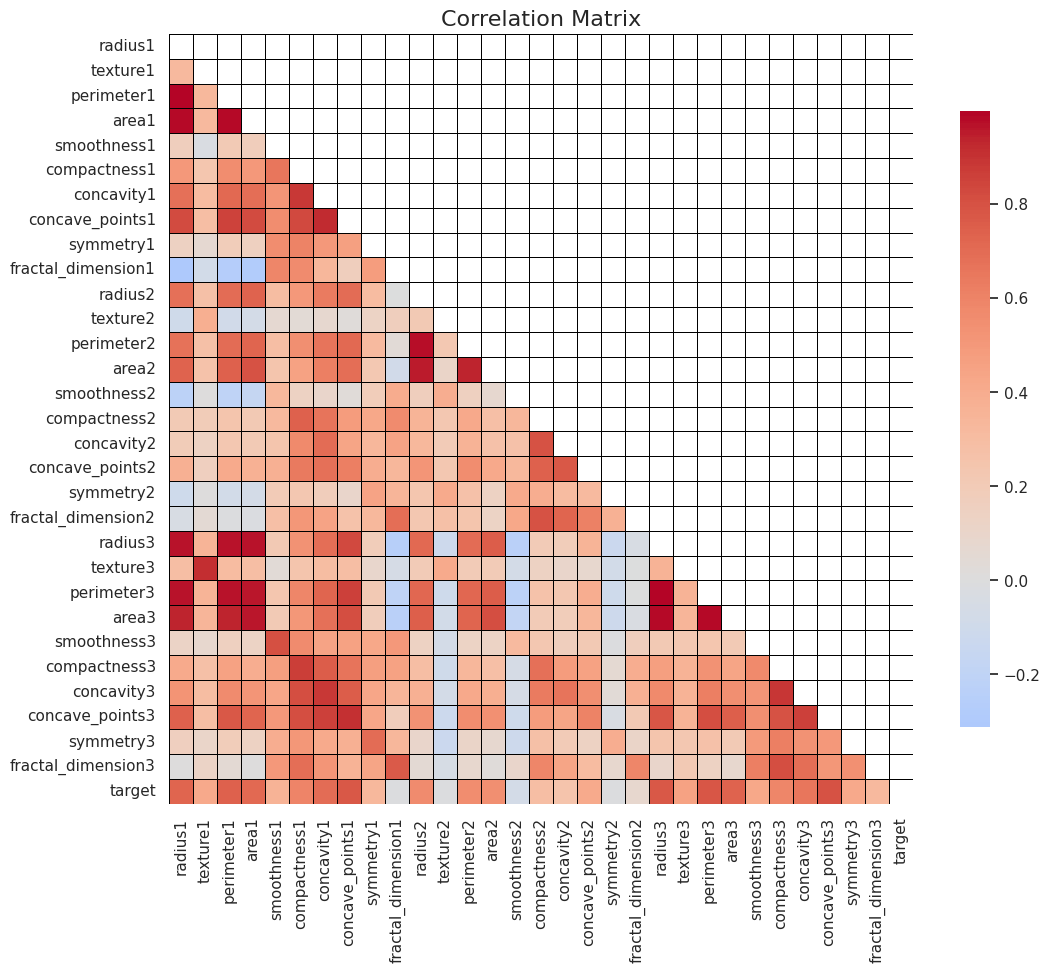

In [40]:
# محاسبه ضریب همبستگی پیرسون
corr_matrix = data.corr()

# ایجاد یک ماسک برای مثلث بالا
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# تنظیمات برای اندازه و استایل نمودار
plt.figure(figsize=(12, 10))
sns.set(style='white')

# رسم heatmap با استفاده از seaborn
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', cbar_kws={"shrink": .8})

# عنوان نمودار
plt.title('Correlation Matrix', fontsize=16)

# نمایش نمودار
plt.show()



In [46]:
# محاسبه ضریب همبستگی پیرسون
corr_matrix = X.corr().abs()

# انتخاب ویژگیها بر اساس آستانه همبستگی
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# حذف ویژگیهای وابسته
X = X.drop(columns=to_drop)

 <div dir="rtl" style="text-align: right;">


* همگنی واریانس:
   * روشهای بررسی: رسم نمودار باقیماندهها در برابر مقادیر پیشبینی شده، آزمونهای آماری مانند آزمون بارتلت.
   * اهمیت: اگر واریانس خطاها در سطوح مختلف متغیر مستقل متفاوت باشد، ممکن است مدل رگرسیون لجستیک به خوبی عمل نکند.

Optimization terminated successfully.
         Current function value: 0.532775
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                  0.1932
Time:                        18:46:26   Log-Likelihood:                -303.15
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 1.443e-29
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
radius1         0.3519      0.039      9.075      0.000       0.276       0.428
texture1       -0.0280    

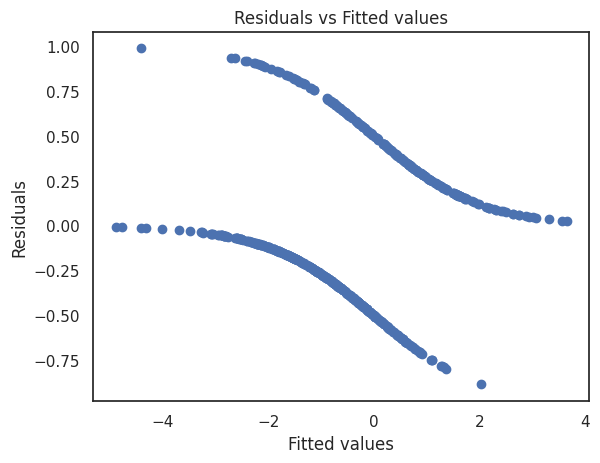

In [50]:
# مدل رگرسیون لجستیک را برازش کنید
import statsmodels.api as sm
model = sm.Logit(y, X).fit()

# خلاصه مدل
print(model.summary())

# رسم نمودار باقیماندهها در برابر مقادیر پیشبینی شده
plt.scatter(model.fittedvalues, model.resid_response)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted values")
plt.show()

In [59]:
import pandas as pd
from scipy.stats import bartlett

def bartlett_test_all_features(data, target_column='target'):
    """
    اجرای آزمون بارتلت برای همه ویژگیهای عددی در یک DataFrame و ذخیره نتایج در یک DataFrame

    Args:
        data: DataFrame حاوی دادهها
        target_column: نام ستون حاوی متغیر گروه بندی (به طور پیش فرض 'target')

    Returns:
        DataFrame: شامل نتایج آزمون بارتلت برای هر ویژگی
    """

    numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
    numeric_cols.remove(target_column)  # حذف ستون هدف

    results = pd.DataFrame(columns=['feature', 'bartlett_statistic', 'p_value'])

    for feature in numeric_cols:
        group1 = data[data[target_column] == 0][feature]
        group2 = data[data[target_column] == 1][feature]
        stat, p = bartlett(group1, group2)
        # Use concat instead of append
        results = pd.concat([results, pd.DataFrame({'feature': [feature], 'bartlett_statistic': [stat.round(2)], 'p_value': [p.round(4)]})], ignore_index=True)
        results = results.sort_values(by='p_value')


    return results

results_df = bartlett_test_all_features(data)
results_df


<ipython-input-59-2cafdf2f039c>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'feature': [feature], 'bartlett_statistic': [stat.round(2)], 'p_value': [p.round(4)]})], ignore_index=True)


,feature,bartlett_statistic,p_value
0,radius1,95.43,0.0000
18,radius3,162.91,0.0000
17,perimeter3,165.89,0.0000
16,symmetry2,36.38,0.0000
15,symmetry3,93.57,0.0000
13,concavity2,42.66,0.0000
12,perimeter1,104.74,0.0000
11,concavity3,18.07,0.0000
10,area1,271.59,0.0000
14,compactness1,61.03,0.0000


<div dir="rtl" style="text-align: right;">

 * آزمون نرمال بودن باقیماندهها:
   * روشهای بررسی: رسم نمودار QQ-plot، آزمونهای آماری مانند آزمون کولموگروف-اسمیرنوف.
   * اهمیت: اگر باقیماندهها نرمال نباشند، ممکن است برخی از مفروضات مدل رگرسیون لجستیک نقض شود.

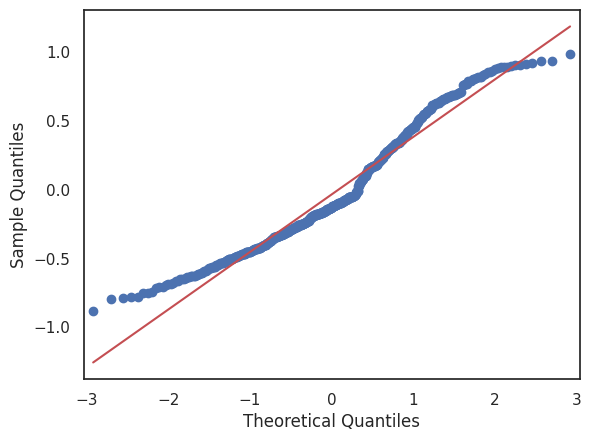

In [62]:
# رسم نمودار QQ-plot
sm.qqplot(model.resid_response, line='s')
plt.show()

In [66]:
# آزمون کولموگروف-اسمیرنوف
k2, p = stats.kstest(model.resid_response, 'norm')
print(k2.round(4), p)

0.2271 2.8595017308785065e-26


<div dir="rtl" style="text-align: right;">

 * آزمون چندخطی بودن:
   * روشهای بررسی: محاسبه ضریب همبستگی بین متغیرهای مستقل، ماتریس همبستگی، فاکتور تورم واریانس (VIF).
   * اهمیت: چندخطی بودن شدید میتواند بر دقت برآورد ضرایب و پایداری مدل تأثیر بگذارد.

In [67]:
# محاسبه VIF
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variable,VIF
0,radius1,22.042184
1,texture1,25.549740
2,smoothness1,33.185020
3,texture2,9.760725
4,smoothness2,9.997254
5,symmetry2,9.578854



<div dir="rtl" style="text-align: right;">

 * آزمون استقلال خطاها:
   * روشهای بررسی: رسم نمودار خودهمبستگی، آزمون دوربین-واتسون.
   * اهمیت: اگر خطاها مستقل نباشند، ممکن است مدل رگرسیونی به خوبی عمل نکند.

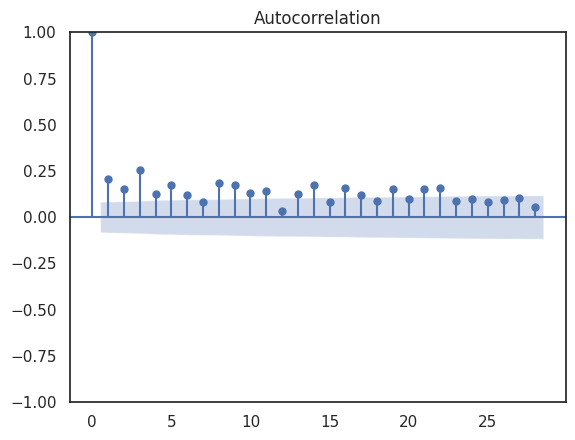

In [69]:
# رسم نمودار خودهمبستگی
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model.resid_response)
plt.show()

In [70]:
# آزمون دوربین-واتسون
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid_response)
dw

1.5798510998558382

<div dir="rtl" style="text-align: right;">


 * [نتیجه بررسی خطی بودن]
 * [نتیجه بررسی همگنی واریانس]
 * [نتیجه بررسی نرمال بودن باقیماندهها]
 * [نتیجه بررسی چندخطی بودن]
 * [نتیجه بررسی استقلال خطاها]


  اگر برخی از مفروضات نقض شده باشند، ممکن است نیاز به انجام پیشپردازشهای دیگری مانند تبدیل دادهها، انتخاب مدل مناسبتر یا استفاده از تکنیکهای کاهش ابعاد باشد.

 <div dir="rtl" style="text-align: right;">



 * نوع دادهها: عددی، طبقهای، ترتیبی؟
 * تعداد متغیرها: چند متغیر مستقل و یک متغیر وابسته دارید؟
 * حجم دادهها: چند مشاهده دارید؟
 * هدف تحلیل: میخواهید چه چیزی را پیشبینی کنید؟


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from collections import Counter


# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# تبدیل y به آرایه numpy و تبدیل مقادیر متنی به عددی
y = y.replace({'M': 1, 'B': 0}).values.ravel()




def doze(X, y):
  counts = Counter(map(tuple, X.values))
  n = np.array([counts[tuple(row)] for row in X.values])
  n = np.round(n, 2)  # در نظر گرفتن اعداد اعشاری با دقت دو رقم اعشار

  b = np.zeros((X.shape[1], 50))
  z = np.zeros((len(y), 50))
  yhat = np.zeros((len(y), 50))
  syhat = np.zeros((X.shape[1], 50))
  kai2 = np.zeros(50)
  e = np.zeros((X.shape[1], 50))
  e[:, 0] = np.zeros(X.shape[1])
  sy = np.zeros(X.shape[1])
  yhat[:, 0] = y
  p = np.zeros((len(y), 50))
  p[:, 0] = (y + 0.5) / (n + 0.5)

  for i in range(49):
    p[:, i] = np.clip(p[:, i], 1e-10, 1 - 1e-10)
    z[:, i] = np.log(p[:, i] / (1 - p[:, i])) + (y - n * p[:, i]) / (n * p[:, i] * (1 - p[:, i]))
    W = np.diag(n * p[:, i] * (1 - p[:, i]))
    b[:, i + 1] = np.linalg.solve(X.T @ W @ X, X.T @ W @ z[:, i])
    xb = np.clip(X @ b[:, i + 1], -500, 500)
    p[:, i + 1] = np.exp(xb) / (1 + np.exp(xb))
    yhat[:, i + 1] = n * p[:, i + 1]
    syhat[:, i + 1] = yhat[:, i + 1] @ X
    sy = y @ X
    e[:, i + 1] = syhat[:, i + 1] - sy
    kai2[i + 1] = np.sum(((y - yhat[:, i + 1]) ** 2) / yhat[:, i + 1])

  return b


# اجرای تابع doze
b_newton = doze(X, y)

# نمایش نتیجه
b_newton

<ipython-input-10-0fed4efaaadb>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'M': 1, 'B': 0}).values.ravel()


array([[ 0.00000000e+00, -4.18109168e-01, -2.50776381e+00, ...,
        -1.22334104e+03, -1.22334104e+03, -1.22334104e+03],
       [ 0.00000000e+00, -4.57142031e-04,  2.66887537e-02, ...,
         2.65745605e+01,  2.65745604e+01,  2.65745605e+01],
       [ 0.00000000e+00,  2.57286013e-02,  7.51893759e-02, ...,
         3.86722730e+01,  3.86722731e+01,  3.86722731e+01],
       ...,
       [ 0.00000000e+00,  4.43018503e-02,  6.88444673e+00, ...,
         1.45626974e+03,  1.45626974e+03,  1.45626974e+03],
       [ 0.00000000e+00,  5.37837807e-02,  7.33204786e+00, ...,
         4.23043205e+03,  4.23043204e+03,  4.23043205e+03],
       [ 0.00000000e+00,  2.20825169e-01,  6.18090339e+01, ...,
         1.10323350e+04,  1.10323350e+04,  1.10323350e+04]])

<div dir="rtl" style="text-align: right;">


بعد با کتابخونه پایتون انجام دادم . چون همگرایی انجام نمیشد بر روی دیتا StandardScaler و PCA زدم.

In [ ]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo

# دریافت دادهها
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# دادهها (به صورت DataFrame های pandas)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# تبدیل y به آرایه numpy و تبدیل مقادیر متنی به عددی
y = y.replace({'M': 1, 'B': 0}).values.ravel()

# استانداردسازی ویژگیها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# کاهش ابعاد با استفاده از PCA
pca = PCA(n_components=10)  # انتخاب تعداد مولفهها
X_pca = pca.fit_transform(X_scaled)

# اضافه کردن ستون بایاس (ستون 1) به ماتریس X
X_pca = sm.add_constant(X_pca)

# مدل رگرسیون لجستیک با استفاده از statsmodels
model = sm.Logit(y, X_pca)
result = model.fit()

# چاپ ضرایب
result.params

Optimization terminated successfully.
         Current function value: 0.056338
         Iterations 11


<ipython-input-69-7e0347493c11>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'M': 1, 'B': 0}).values.ravel()


array([-0.20570784,  3.45537761, -2.0178971 , -0.6287444 ,  0.76905411,
        1.67969605, -0.53043049,  0.41595435,  1.35546809,  2.12629722,
       -1.07373391])

In [ ]:
b_newton[0:,-1]

array([-1.22334104e+03,  2.65745605e+01,  3.86722731e+01,  9.02124355e+00,
        9.25416465e+03, -1.10535653e+04,  5.86759078e+03,  5.97570839e+03,
       -4.16975114e+03,  1.33858533e+04,  6.90652208e+02, -4.49720012e+01,
       -2.32804732e+02,  2.08057745e+01, -1.92951138e+04,  1.87611146e+04,
       -1.54898939e+04,  6.05195684e+04, -1.89053506e+04, -1.46592982e+05,
        3.18879271e+02,  1.13175745e+01,  1.14234878e+01, -2.08470378e+00,
       -1.25109685e+03, -1.52341868e+03,  1.25994917e+03,  1.45626974e+03,
        4.23043205e+03,  1.10323350e+04])

<div dir="rtl" style="text-align: right;">


همان طور که مشهود هست ضرایب یکسان نیست چون جنس داده ها متفاوت است پس داده ها را یکسان کردم تا نتایج قابل مقایسه شود

In [ ]:

# دریافت دادهها
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# دادهها (به صورت DataFrame های pandas)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# تبدیل y به آرایه numpy و تبدیل مقادیر متنی به عددی
y = y.replace({'M': 1, 'B': 0}).values.ravel()

# استانداردسازی ویژگیها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# کاهش ابعاد با استفاده از PCA
pca = PCA(n_components=10)  # انتخاب تعداد مولفهها
X_pca = pca.fit_transform(X_scaled)

# اضافه کردن ستون بایاس (ستون 1) به ماتریس X
X_pca = np.column_stack((np.ones(X_pca.shape[0]), X_pca))

# تابع doze بهروزرسانی شده
def doze(X, y):
  n = np.ones(len(y))  # فرض میکنیم تعداد مشاهدات برای هر نقطه داده برابر با 1 است
  b = np.zeros((X.shape[1], 50))
  z = np.zeros((len(y), 50))
  yhat = np.zeros((len(y), 50))
  syhat = np.zeros((X.shape[1], 50))
  kai2 = np.zeros(50)
  e = np.zeros((X.shape[1], 50))
  e[:, 0] = np.zeros(X.shape[1])
  sy = np.zeros(X.shape[1])
  yhat[:, 0] = y
  p = np.zeros((len(y), 50))
  p[:, 0] = (y + 0.5) / (n + 0.5)

  for i in range(49):
    p[:, i] = np.clip(p[:, i], 1e-10, 1 - 1e-10)
    z[:, i] = np.log(p[:, i] / (1 - p[:, i])) + (y - n * p[:, i]) / (n * p[:, i] * (1 - p[:, i]))
    W = np.diag(n * p[:, i] * (1 - p[:, i]))
    b[:, i + 1] = np.linalg.solve(X.T @ W @ X, X.T @ W @ z[:, i])
    xb = np.clip(X @ b[:, i + 1], -500, 500)
    p[:, i + 1] = np.exp(xb) / (1 + np.exp(xb))
    yhat[:, i + 1] = n * p[:, i + 1]
    syhat[:, i + 1] = yhat[:, i + 1] @ X
    sy = y @ X
    e[:, i + 1] = syhat[:, i + 1] - sy
    kai2[i + 1] = np.sum(((y - yhat[:, i + 1]) ** 2) / yhat[:, i + 1])
  return b

# اجرای تابع doze
b_newton = doze(X_pca, y)

# نمایش نتیجه
print("ضرایب محاسبه شده توسط تابع doze:")
print(b_newton[:, -1])

# مدل رگرسیون لجستیک با استفاده از statsmodels
model = sm.Logit(y, X_pca)
result = model.fit()

# چاپ ضرایب
print("ضرایب محاسبه شده توسط statsmodels:")
print(result.params)


ضرایب محاسبه شده توسط تابع doze:
[-0.20570793  3.45537743 -2.017897   -0.62874441  0.7690541   1.67969595
 -0.53043045  0.41595422  1.35546802  2.12629706 -1.07373383]
Optimization terminated successfully.
         Current function value: 0.056338
         Iterations 11
ضرایب محاسبه شده توسط statsmodels:
[-0.20570784  3.45537761 -2.0178971  -0.6287444   0.76905411  1.67969605
 -0.53043049  0.41595435  1.35546809  2.12629722 -1.07373391]


<ipython-input-71-c562ec446acf>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'M': 1, 'B': 0}).values.ravel()


<div dir="rtl" style="text-align: right;">


**همبن طور که در جدول پایین مشهود هست بعد پاکسازی داده ها نتیجه ضرایب
 از هر دو روش
بسیار بهم نزدیک است**

In [ ]:

# ایجاد DataFrame برای نمایش نتایج
df = pd.DataFrame({
'doze_coefficients': b_newton[:, -1],
'statsmodels_coefficients': result.params,
'difference': b_newton[:, -1] - result.params
})
df

,doze_coefficients,statsmodels_coefficients,difference
0,-0.205708,-0.205708,-9.106975e-08
1,3.455377,3.455378,-1.774338e-07
2,-2.017897,-2.017897,1.040000e-07
3,-0.628744,-0.628744,-1.686647e-08
4,0.769054,0.769054,-1.312224e-08
5,1.679696,1.679696,-1.022437e-07
6,-0.530430,-0.530430,4.024302e-08
7,0.415954,0.415954,-1.248952e-07
8,1.355468,1.355468,-6.867547e-08
9,2.126297,2.126297,-1.594665e-07
